In [27]:
import numpy as np
import matplotlib.pyplot as plt
import glob, os, re, pathlib
from pathlib import Path

DATA_DIR = "/fast_storage/intern/data/data_curation"
DATA_DIR_POSTFIX = ["brats", "fastmri", "oasis3", "snuh"]

import nibabel as nib


def load_nifti_image(file_path):
    img = nib.load(str(file_path))
    data = img.get_fdata()
    return data

def load_nifti_meta(file_path):
    img = nib.load(str(file_path))
    header = img.header
    return header.__str__()

In [28]:
# BRATS dataset
BRATS_DIR = f"{DATA_DIR}/brats"
BRATS_IMAGE = f"{DATA_DIR}/brats/image"
BRATS_SEG = f"{DATA_DIR}/brats/seg"

print(f"{len(glob.glob(os.path.join(BRATS_SEG, '*.nii.gz')))} BRATS data in {BRATS_DIR}")


def find_all_uids(root):
    uids = set()
    for p in Path(root).glob("*.nii.gz"):
        m = re.search(r"BraTS2021_(\d+)_", p.name)
        if m:
            uids.add(m.group(1))
    return sorted(uids)


def get_brats_case(case_id: str, root: str):
    """
    Get file paths for a given BRATS case ID.
    Args:
        case_id (str): The case ID to look for (e.g., "00000").
        root (str): The root directory containing "seg" and "image" subdirectories.
    Returns:
        dict: A dictionary with keys "seg", "flair", "t1", "t1ce", "t2" and their corresponding file paths.
    Raises:
        FileNotFoundError: If any of the required files are not found.
    """
    root = Path(root)
    seg_root = root / "seg"
    modality_root = root / "image"
    modalities = ["flair", "t1", "t1ce", "t2"]

    files = {}
    # segmentation file
    seg_pattern = f"*_{case_id}_seg.nii.gz"
    seg_matches = list(seg_root.glob(seg_pattern))
    if len(seg_matches) != 1:
        raise FileNotFoundError(f"{case_id} seg: {seg_matches}")
    files["seg"] = seg_matches[0]

    # modality files
    for m in modalities:
        pattern = f"*_{case_id}_{m}.nii.gz"
        matches = list(modality_root.glob(pattern))
        if len(matches) != 1:
            raise FileNotFoundError(f"{case_id} {m}: {matches}")
        files[m] = matches[0]

    return files


uids = find_all_uids(BRATS_SEG)
case_files = get_brats_case("00000", BRATS_DIR)
print(case_files)

1251 BRATS data in /fast_storage/intern/data/data_curation/brats
{'seg': PosixPath('/fast_storage/intern/data/data_curation/brats/seg/brats_BraTS2021_00000_seg.nii.gz'), 'flair': PosixPath('/fast_storage/intern/data/data_curation/brats/image/brats_BraTS2021_00000_flair.nii.gz'), 't1': PosixPath('/fast_storage/intern/data/data_curation/brats/image/brats_BraTS2021_00000_t1.nii.gz'), 't1ce': PosixPath('/fast_storage/intern/data/data_curation/brats/image/brats_BraTS2021_00000_t1ce.nii.gz'), 't2': PosixPath('/fast_storage/intern/data/data_curation/brats/image/brats_BraTS2021_00000_t2.nii.gz')}


seg: shape=(240, 240, 155), dtype=float64
flair: shape=(240, 240, 155), dtype=float64
t1: shape=(240, 240, 155), dtype=float64
t1ce: shape=(240, 240, 155), dtype=float64
t2: shape=(240, 240, 155), dtype=float64


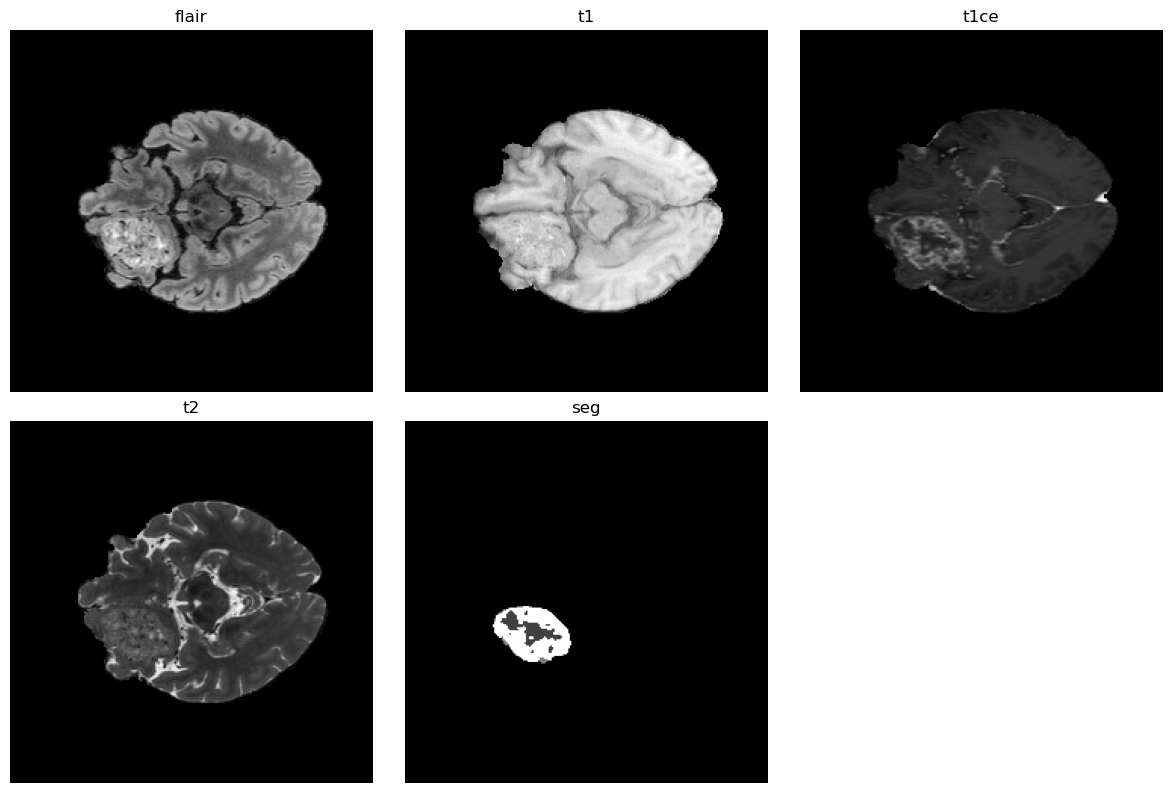

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : np.bytes_(b'')
db_name         : np.bytes_(b'')
extents         : 0
session_error   : 0
regular         : np.bytes_(b'r')
dim_info        : 0
dim             : [  3 240 240 155   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1. 1. 1. 1. 0. 0. 0. 0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : np.bytes_(b'')
aux_file        : np.bytes_(b'')
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 1.0
qoffset_x       : 0.0
qoffset_y       : 239.0
qoffset_z       : 0.0

In [29]:
# BRATS visualization
brats_case_id = "00000"
brats_files = get_brats_case(brats_case_id, BRATS_DIR)
brats_images = {modality: load_nifti_image(path) for modality, path in brats_files.items()}
for modality, data in brats_images.items():
    print(f"{modality}: shape={data.shape}, dtype={data.dtype}")
slice_idx = 60
plt.figure(figsize=(12, 8))
modalities = ["flair", "t1", "t1ce", "t2", "seg"]
for i, modality in enumerate(modalities):
    plt.subplot(2, 3, i + 1)
    plt.imshow(brats_images[modality][:, :, slice_idx], cmap="gray")
    plt.title(modality)
    plt.axis("off")
plt.tight_layout()
plt.show()

print(load_nifti_meta(brats_files["flair"]))

In [30]:
# FASTMRI dataset
FASTMRI_DIR = f"{DATA_DIR}/fastmri/image"


def find_all_uids(root):
    uids = set()
    for p in Path(root).glob("*.nii.gz"):
        m = re.search(r"fastmri_(\d+)_", p.name)
        if m:
            uids.add(m.group(1))
    return sorted(uids)


uids = find_all_uids(FASTMRI_DIR)
print(f"{len(uids)} FASTMRI data in {FASTMRI_DIR}")
print(uids[:5])


def get_fastmri_case(case_id: str, root: str):
    """
    Get FASTMRI case files by case ID.
    Args:
        case_id (str): The case ID to search for.
        root (str): The root directory containing FASTMRI data.
    Returns:
        list of tuples: List of (image_file, metadata_file) tuples for the case.
    """
    root = Path(root)
    pattern = f"*_{case_id}_*.nii.gz"
    meta_pattern = f"*_{case_id}_*.json"
    matches = list(root.glob(pattern))
    meta_matches = list(root.glob(meta_pattern))
    if len(matches) == 0:
        raise FileNotFoundError(f"{case_id} : {matches}")
    return [(match, meta) for match, meta in zip(matches, meta_matches)]


uid = "100099070170"
fastmri_file = get_fastmri_case(uid, FASTMRI_DIR)
print(fastmri_file)

6017 FASTMRI data in /fast_storage/intern/data/data_curation/fastmri/image
['100099070170', '100128575327', '100227274637', '100506510965', '100850027829']
[(PosixPath('/fast_storage/intern/data/data_curation/fastmri/image/fastmri_100099070170_Axial_T1_FSE_POST_16.nii.gz'), PosixPath('/fast_storage/intern/data/data_curation/fastmri/image/fastmri_100099070170_Axial_T1_FSE_12.json')), (PosixPath('/fast_storage/intern/data/data_curation/fastmri/image/fastmri_100099070170_Axial_T1_FSE_12.nii.gz'), PosixPath('/fast_storage/intern/data/data_curation/fastmri/image/fastmri_100099070170_Axial_T1_FSE_POST_16.json'))]


FASTMRI image shape: (512, 512, 16), dtype: float64


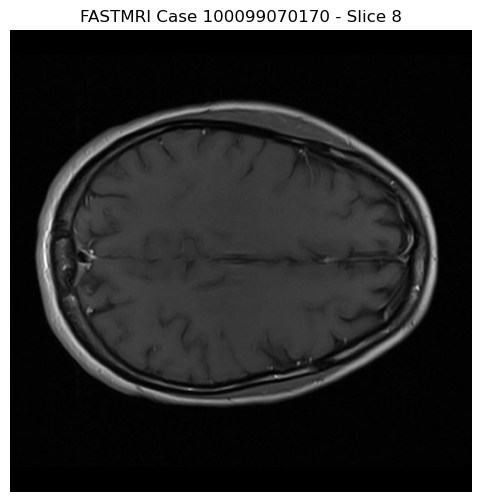

In [31]:
# FastMRI visualization

fastmri_image_path, fastmri_meta_path = fastmri_file[0]
fastmri_image = load_nifti_image(fastmri_image_path)
print(f"FASTMRI image shape: {fastmri_image.shape}, dtype: {fastmri_image.dtype}")
slice_idx = fastmri_image.shape[2] // 2
plt.figure(figsize=(6, 6))
plt.imshow(fastmri_image[:, :, slice_idx], cmap="gray")
plt.title(f"FASTMRI Case {uid} - Slice {slice_idx}")
plt.axis("off")
plt.show()

In [32]:
# OASIS3 dataset

OASIS3_DIR = f"{DATA_DIR}/oasis3/image"
_UID_RE = re.compile(r"sub-(OAS\d+)")
_META_RE = re.compile(r"sub-(OAS\d+)_ses[s]?-(\w+).*_(\w+)\.(nii\.gz|json)$")


def get_uid_list(root: str | Path) -> list[str]:
    root = Path(root)
    uids = set()

    for p in root.iterdir():
        if not p.is_file():
            continue
        m = _UID_RE.search(p.name)
        if m:
            uids.add(m.group(1))

    return sorted(uids)


def _parse_oasis_file(p: Path):
    m = _META_RE.search(p.name)
    if not m:
        return None
    uid, session, modality, ext = m.groups()
    return uid, session, modality, ext


from collections import defaultdict


def get_scans_by_uid(root: str | Path, uid: str):
    root = Path(root)
    meta = {
        "uid": uid,
        "sessions": set(),
        "modalities": set(),
    }
    scans = defaultdict(lambda: defaultdict(dict))
    # scans[session][modality]["nii"|"json"] = Path
    for p in root.iterdir():
        if not p.is_file():
            continue
        parsed = _parse_oasis_file(p)
        if parsed is None:
            continue
        f_uid, session, modality, ext = parsed
        if f_uid != uid:
            continue

        key = "nii" if ext == "nii.gz" else "json"

        scans[session][modality][key] = p
        meta["sessions"].add(session)
        meta["modalities"].add(modality)

    meta["sessions"] = sorted(meta["sessions"])
    meta["modalities"] = sorted(meta["modalities"])

    return meta, scans


uids = get_uid_list(OASIS3_DIR)
print(f"{len(uids)} OASIS3 data in {OASIS3_DIR}")
print(uids[:5])
uid = uids[0]
oasis3_meta, oasis3_scans = get_scans_by_uid(OASIS3_DIR, uid)
print(oasis3_meta)

1376 OASIS3 data in /fast_storage/intern/data/data_curation/oasis3/image
['OAS30001', 'OAS30002', 'OAS30003', 'OAS30004', 'OAS30005']
{'uid': 'OAS30001', 'sessions': ['d0129', 'd0129_acq', 'd0129_run', 'd0757', 'd0757_acq', 'd0757_run', 'd2430', 'd2430_acq', 'd3132', 'd3132_acq', 'd3746', 'd3746_acq', 'd4467'], 'modalities': ['FLAIR', 'T1w', 'T2w']}


OASIS3 image shape: (256, 256, 36), dtype: float64


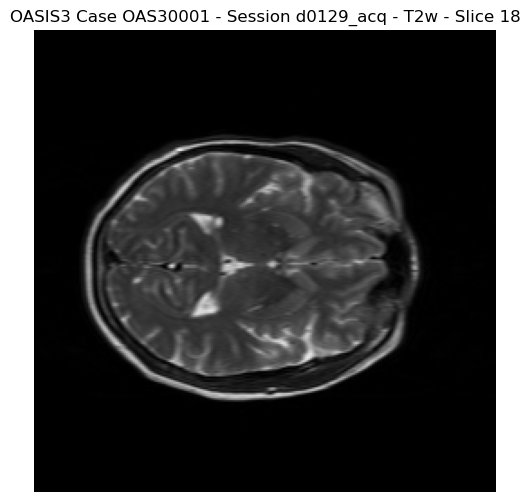

In [33]:
# OASIS3 visualization
oasis3_session = oasis3_meta["sessions"][1]
modality = "T2w"
oasis3_image_path = oasis3_scans[oasis3_session][modality]["nii"]
oasis3_image = load_nifti_image(oasis3_image_path)
print(f"OASIS3 image shape: {oasis3_image.shape}, dtype: {oasis3_image.dtype}")
slice_idx = oasis3_image.shape[2] // 2
plt.figure(figsize=(6, 6))
plt.imshow(oasis3_image[:, :, slice_idx], cmap="gray")
plt.title(f"OASIS3 Case {uid} - Session {oasis3_session} - {modality} - Slice {slice_idx}")
plt.axis("off")
plt.show()